In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import corner

datos=np.load('test_line.npy')

# Visualización de datos

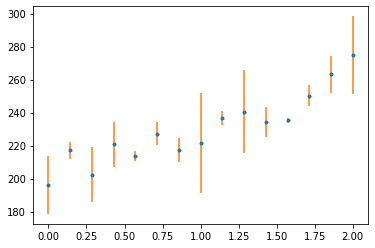

In [14]:

plt.plot(datos[0,:], datos[1,:], 'o', label='Original data', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.show()

# MCMC 

In [21]:
#función del prior plano
def log_prior(theta):
    b, m = theta
    if -1000 < m < 1000 and -300 < b < 300 :
        return 1.0
    else:
        return -np.inf

#definimos el likelihood para una recta con sigma fija
def log_likelihood(theta, x, y):
    b, m = theta
    y_model = b + m * x
    return -0.5 * np.sum(np.log(2 * np.pi * 0.02 ** 2) + (y - y_model) ** 2 / 0.02 ** 2)

#función para calcular el posterior
def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

def Gelman(s,w,mean,samples,N):
    if w==1:
        return 0
    else:
        S2=[np.square(s[:,0]).sum()/w,np.square(s[:,1]).sum()/w]
        Bn=[np.var(mean[:,0], ddof=1),np.var(mean[:,1], ddof=1)]
        Sig2=[(N-1)*S2[0]/N  +Bn[0],(N-1)*S2[1]/N  +Bn[1]]
        R=np.sqrt(np.divide(Sig2,S2))
    return R
    

#realizamos el proceso de sampleo para modificar nuestro parámetro
def sampleo( x, y, N, w): #x,y:datos; N: número de sampleos; w:número de caminadores
    print(str(w)+' caminadores')
    s=np.zeros(w*2).reshape([w,2])
    for j in range(w): 
        
        nuevo=np.zeros(2)
        theta=[random.uniform(180, 210),random.uniform(10, 20)] #elegimos al azar entre un rango de valores
        post=[theta]
        aceptacion=0 #inicializamos contador para saber la tasa de aceptación
        for i in range(N):

            #calculamos las propuestas de los parámetros de la recta de manera aleatoria
            nuevo[0]=  np.random.normal(theta[0], 0.2)
            nuevo[1]=  np.random.normal(theta[1], 0.2)
           
            #calculamos el posterior para el caso anterior y el nuevo (aleatorio)
            p_current = log_posterior(theta,x,y)
            p_proposal = log_posterior(nuevo,x,y)
                       
            #si es mayor el nuevo posterior lo aceptamos
            if p_proposal>p_current:
                theta= np.array(nuevo)
                aceptacion+=1
           
        #si no es mayor comparamos la división del posterior nuevo con el anterior con un número al azar entre cero y 1
        #si es mayor lo aceptamos       
            else:
                p_accept =  p_current/ p_proposal
                accept = np.random.rand() 
                
                if accept> p_accept:
                    theta= np.array(nuevo)
                    aceptacion+=1
            
            post=np.append(post,[theta],axis=0) #guardamos los valores de los parámetros en un array
          
        #imprimimos información del proceso dependiendo del número de caminador que es
        if j==0:
            samples=np.array(post)
            s[j,0]=np.var(samples[:,0], ddof=1)
            s[j,1]=np.var(samples[:,1], ddof=1)
            mean=np.array([np.mean(samples[:,0]),np.mean(samples[:,1])])
            plt.clf();
            print('pendiente caminador '+str(j+1)+':'+str(mean[1]))
            print('ordenada al origen caminador '+str(j+1)+':'+str(mean[0]))
            plt.title('Parámetros')
            plt.ylabel('b')
            plt.xlabel('m')
            plt.scatter(samples[:,0],samples[:,1], c='g')
            plt.show()
            plt.clf();

            

        else:
            isamples=np.array(post)
            s[j,0]=np.var(isamples[:,0], ddof=1)
            s[j,1]=np.var(isamples[:,1], ddof=1)
            mean=np.vstack([mean, [np.mean(isamples[:,0]),np.mean(isamples[:,1])]])
            print('pendiente caminador '+str(j+1)+':'+str(mean[j,1]))
            print('ordenada al origen caminador '+str(j+1)+':'+str(mean[j,0]))
            samples = np.vstack([samples, isamples])
            plt.title('Parámetros')
            plt.ylabel('b')
            plt.xlabel('m')
            plt.scatter(isamples[:,0],isamples[:,1], c='g')
            plt.show()
            plt.clf()
        
        #calculamos e imprimimos la tasa de aceptación
        tasa=aceptacion/N
        print('tasa de aceptacion caminador '+str(j+1)+':'+str(tasa))
        print('\n')
    
    R=Gelman(s,w,mean,samples,N)
    print('R '+str(R))

    return samples,tasa




5 caminadores
pendiente caminador 1:30.47369288199036
ordenada al origen caminador 1:199.51233892496677


<Figure size 432x288 with 0 Axes>

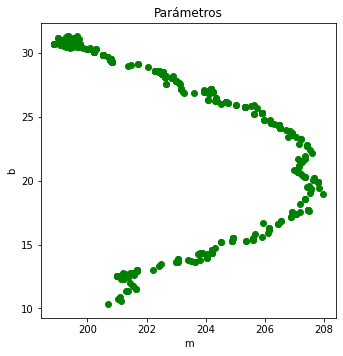

tasa de aceptacion caminador 1:0.0308


pendiente caminador 2:30.615632231117395
ordenada al origen caminador 2:199.49368499873572


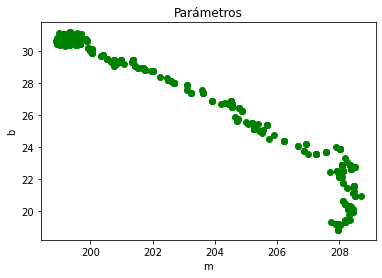

tasa de aceptacion caminador 2:0.024


pendiente caminador 3:30.588881551956227
ordenada al origen caminador 3:199.09721755351276


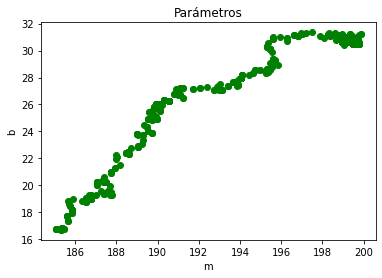

tasa de aceptacion caminador 3:0.0244


pendiente caminador 4:30.47437204992426
ordenada al origen caminador 4:199.54258878563718


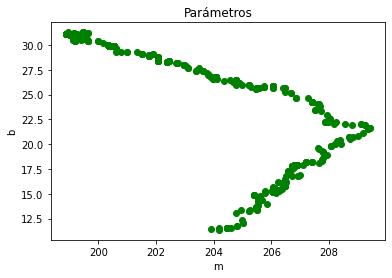

tasa de aceptacion caminador 4:0.022


pendiente caminador 5:30.369205908558403
ordenada al origen caminador 5:199.2248480899723


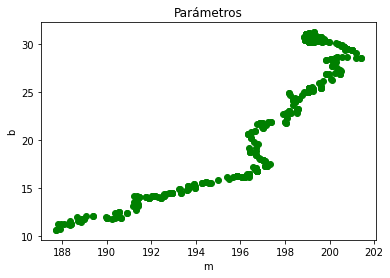

tasa de aceptacion caminador 5:0.0297


R [1.00976517 1.00038349]
pendiente promedio: 30.762307652444626
ordenada al origen promedio: 199.2034154659034


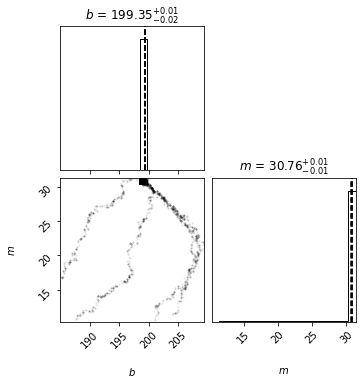

In [28]:
#calculamos los parámetros y la tasa de aceptación  
posterior,tasa=sampleo( datos[0], datos[1], 10000, 5)
m=np.mean(posterior[:,1])
b=np.mean(posterior[:,0])
print('pendiente promedio: '+str(m2))
print('ordenada al origen promedio: '+str(b2))
#graficamos los resultados de los parámetros 
figure = corner.corner(posterior, labels=[r"$b$", r"$m$"],quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12});
figure



# Chi cuadrada

In [27]:
#obtenemos el numero total de datos n
n=len(datos[0,:])
print(n)
#obtenemos la media de los X
x_mean=np.mean(datos[0,:])
#obtenemos la suma total de cada Xi elevado al cuadrado
sq= datos[0,:]*datos[0,:]
x2_sum=sq.sum()
#obtenemos la suma de multimpliacar cada elemento Xi con cada Yi
sq2=datos[0,:]*datos[1,:]
xy_sum=sq2.sum()
#la media de los valores de Y
y_mean=np.mean(datos[1,:])

c2= ((y_mean* x2_sum)- (x_mean * xy_sum) )/(x2_sum - (n*(x_mean)**2))
print(c2)

m2= (xy_sum -n*y_mean*x_mean)/(x2_sum - n*(x_mean**2))
print(m2)

15
199.342724044055
30.762307652444626


# Comparación de métodos

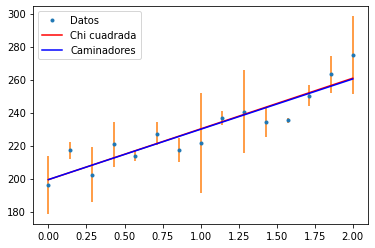

pendiente chi cuadrada: 30.762307652444626 pendiente MCMC: 30.504356924709324
ordenada al origen chi cuadrada: 199.37413567056498 ordenada al origen MCMC: 199.342724044055


In [32]:
plt.plot(datos[0,:], datos[1,:], 'o', label='Datos', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.plot(datos[0,:], m2*datos[0,:] + c2, 'r', label='Chi cuadrada')
plt.plot(datos[0,:], m*datos[0,:] + b, 'b', label='Caminadores')
plt.legend()
plt.show()
print('pendiente chi cuadrada: '+str(m2)+' pendiente MCMC: '+str(m))
print('ordenada al origen chi cuadrada: '+str(b)+' ordenada al origen MCMC: '+str(c2))